In [140]:
# mehrdim. Datensatz mit mehreren Clustern generieren mit Hilfe v. Verteilungsfkt
# versucht die Daten mit KMeans zu clustern
# manipuliert die Daten und konstruiert Fälle in denen das Clustering nicht mehr wie gewünscht funktioniert
#(Daten skalieren, falsche Cluster Anzahl, vorgegebene Intialisierung

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.cluster import KMeans

array([ 0.90280813,  0.24015065,  1.46622738, ..., 12.46781239,
        2.17599732,  1.54312887])

,x,y
0,0.902808,0.710336
1,0.240151,1.898800
2,1.466227,-0.718983
3,-1.740291,0.158056
4,-0.286315,0.433706
5,-0.236824,0.074702
6,-0.969089,1.655503
7,1.410993,0.106062
8,0.404837,-1.009137
9,0.176951,-0.206340


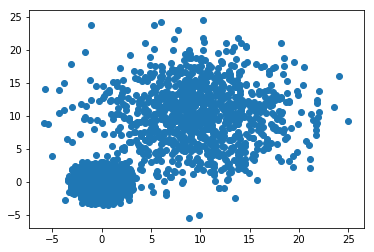

In [141]:
x = np.random.normal(0,1,10000)
y = np.random.normal(0,1,10000)
#plt.scatter(x,y)

x2 = np.random.normal(10,5,1000)
y2 = np.random.normal(10,5,1000)
xnew = np.concatenate([x,x2])
ynew = np.concatenate([y,y2])
plt.scatter(xnew,ynew)
display(xnew)
dataset = pd.DataFrame()
dataset["x"] = xnew
dataset["y"] = ynew
dataset

# Anzahl Cluster falsch gewählt

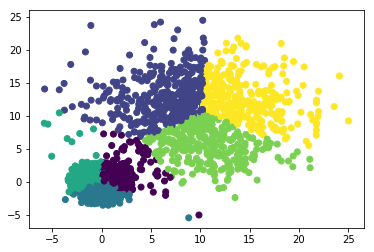

In [142]:
K = KMeans(n_clusters=6,random_state=1).fit(dataset)
#dataset["GroupLabel"] = K.predict(dataset)
plt.scatter(xnew,ynew,c=K.labels_)

# Startbedingungen führen zu unterschiedlichen Ergebnissen

In [143]:
# n_init bestimmt, wie oft KMeans durchgeführt wird
start_array = np.array([[1,1],[1,1],[1,1],[1,1]])
print(pd.DataFrame(x).describe())
print(pd.DataFrame(y).describe())
print(pd.DataFrame(x2).describe())
print(pd.DataFrame(y2).describe())
type(start_array)
dataset.describe()

                  0
count  10000.000000
mean       0.009433
std        0.996026
min       -3.660668
25%       -0.666288
50%        0.001462
75%        0.672545
max        4.005274
                  0
count  10000.000000
mean      -0.001424
std        0.991579
min       -3.581172
25%       -0.669026
50%        0.008631
75%        0.674286
max        3.908674
                 0
count  1000.000000
mean      9.721378
std       4.960058
min      -5.796477
25%       6.502163
50%       9.803200
75%      13.017754
max      25.001619
                 0
count  1000.000000
mean     10.104024
std       4.764285
min      -5.488693
25%       6.889922
50%      10.261010
75%      13.211055
max      24.451003


,x,y
count,11000.000000,11000.000000
mean,0.892337,0.917253
std,3.306403,3.375781
min,-5.796477,-5.488693
25%,-0.597012,-0.596213
50%,0.133117,0.134792
75%,0.915437,0.928069
max,25.001619,24.451003


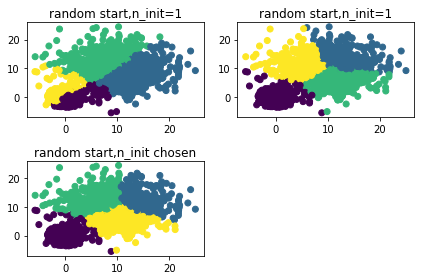

In [144]:
K = KMeans(n_clusters=4,n_init=1).fit(dataset)
K2 = KMeans(n_clusters=4,n_init=1).fit(dataset)
K3 = KMeans(n_clusters=4,n_init=1,init=start_array).fit(dataset)
plt.subplot(2,2,1)
plt.scatter(xnew,ynew,c=K.labels_)
plt.title("random start,n_init=1")
plt.subplot(2,2,2)
plt.scatter(xnew,ynew,c=K2.labels_)
plt.title("random start,n_init=1")
plt.subplot(2,2,3)
plt.scatter(xnew,ynew,c=K3.labels_)
plt.title("random start,n_init chosen")
plt.tight_layout()

# Varianzen und Range der Variablen beeinflussen das Clustering

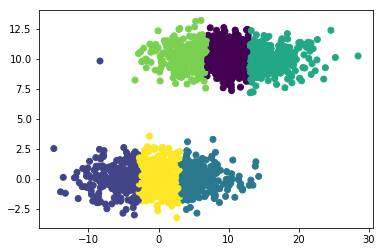

In [133]:
# x hat größere Varianz
x = np.random.normal(0,5,1000)
y = np.random.normal(0,1,1000)
#plt.scatter(x,y)

x2 = np.random.normal(10,5,1000)
y2 = np.random.normal(10,1,1000)
xnew = np.concatenate([x,x2])
ynew = np.concatenate([y,y2])

dataset = pd.DataFrame()
dataset["x"] = xnew
dataset["y"] = ynew

K = KMeans(n_clusters=6,random_state=1).fit(dataset)
dataset["GroupLabel"] = K.predict(dataset)
plt.scatter(xnew,ynew,c=K.labels_)

# x hat größere Varianz --> Cluster werden entlang der x-Achse gebildet

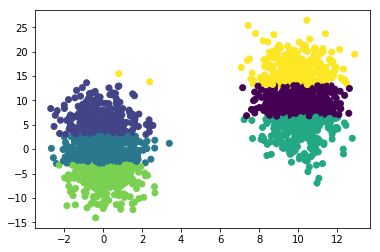

In [134]:
# y hat größere Varianz
x = np.random.normal(0,1,1000)
y = np.random.normal(0,5,1000)
#plt.scatter(x,y)

x2 = np.random.normal(10,1,1000)
y2 = np.random.normal(10,5,1000)
xnew = np.concatenate([x,x2])
ynew = np.concatenate([y,y2])

dataset = pd.DataFrame()
dataset["x"] = xnew
dataset["y"] = ynew

K = KMeans(n_clusters=6,random_state=1).fit(dataset)
dataset["GroupLabel"] = K.predict(dataset)
plt.scatter(xnew,ynew,c=K.labels_)

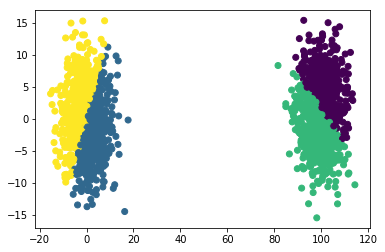

In [135]:
# x hat größeren Wertebereich

x = np.random.normal(0,5,1000)
y = np.random.normal(0,5,1000)
#plt.scatter(x,y)

x2 = np.random.normal(100,5,1000)
y2 = np.random.normal(1,5,1000)
xnew = np.concatenate([x,x2])
ynew = np.concatenate([y,y2])

dataset = pd.DataFrame()
dataset["x"] = xnew
dataset["y"] = ynew

K = KMeans(n_clusters=4,random_state=1).fit(dataset)
dataset["GroupLabel"] = K.predict(dataset)
plt.scatter(xnew,ynew,c=K.labels_)

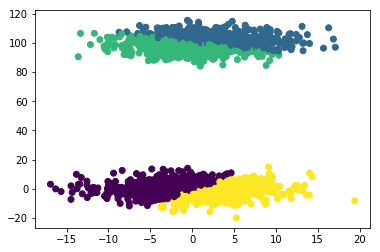

In [136]:
# y hat größeren Wertebereich

x = np.random.normal(0,5,1000)
y = np.random.normal(0,5,1000)
#plt.scatter(x,y)

x2 = np.random.normal(1,5,1000)
y2 = np.random.normal(100,5,1000)
xnew = np.concatenate([x,x2])
ynew = np.concatenate([y,y2])

dataset = pd.DataFrame()
dataset["x"] = xnew
dataset["y"] = ynew

K = KMeans(n_clusters=4,random_state=1).fit(dataset)
dataset["GroupLabel"] = K.predict(dataset)
plt.scatter(xnew,ynew,c=K.labels_)

# Einfluss von Standardisierung auf Clustering

Y has larger variance


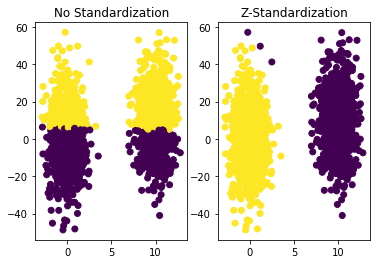

In [137]:
from scipy import stats

# y hat größere Varianz 
x = np.random.normal(0,1,1000)
y = np.random.normal(0,15,1000)

x2 = np.random.normal(10,1,1000)
y2 = np.random.normal(10,15,1000)

xnew = np.concatenate([x,x2])
ynew = np.concatenate([y,y2])

xnew_stand = stats.zscore(xnew)
ynew_stand = stats.zscore(ynew)

dataset = pd.DataFrame()
dataset["x"] = xnew
dataset["y"] = ynew

dataset_stand = pd.DataFrame()
dataset_stand["x"] = xnew_stand
dataset_stand["y"] = ynew_stand

K = KMeans(n_clusters=2,random_state=1).fit(dataset)
Kstand = KMeans(n_clusters=2,random_state=1).fit(dataset_stand)

print("Y has larger variance")

plt.subplot(1,2,1)
plt.scatter(xnew,ynew,c=K.labels_)
plt.title("No Standardization")

plt.subplot(1,2,2)
plt.title("Z-Standardization")
plt.scatter(xnew,ynew,c = Kstand.labels_)

Y has larger range


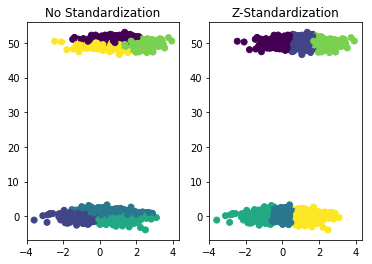

In [138]:
# y hat größeren Range
x = np.random.normal(0,1,1000)
y = np.random.normal(0,1,1000)

x2 = np.random.normal(1,1,1000)
y2 = np.random.normal(50,1,1000)

xnew = np.concatenate([x,x2])
ynew = np.concatenate([y,y2])

xnew_stand = stats.zscore(xnew)
ynew_stand = stats.zscore(ynew)

dataset = pd.DataFrame()
dataset["x"] = xnew
dataset["y"] = ynew

dataset_stand = pd.DataFrame()
dataset_stand["x"] = xnew_stand
dataset_stand["y"] = ynew_stand

K = KMeans(n_clusters=6,random_state=1).fit(dataset)
Kstand = KMeans(n_clusters=6,random_state=1).fit(dataset_stand)

print("Y has larger range")

plt.subplot(1,2,1)
plt.scatter(xnew,ynew,c=K.labels_)
plt.title("No Standardization")

plt.subplot(1,2,2)
plt.title("Z-Standardization")
plt.scatter(xnew,ynew,c = Kstand.labels_)